# PCA变换对比

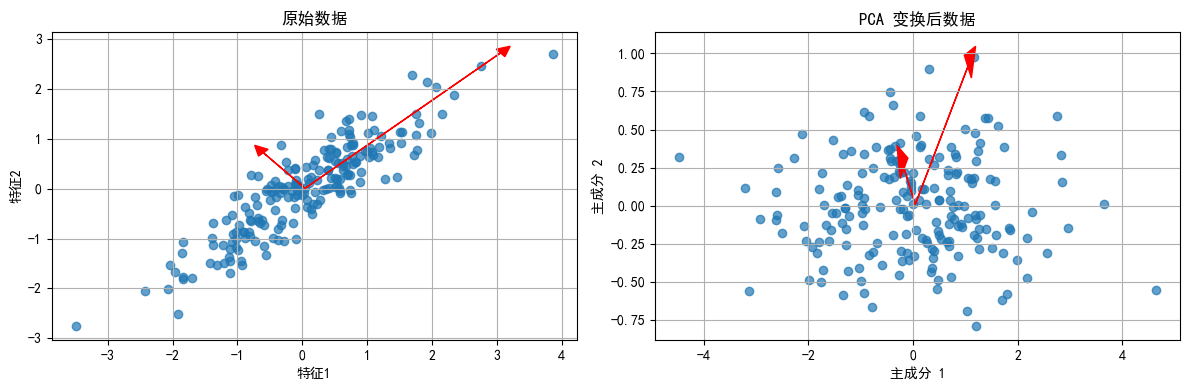

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
	
# 创建一个模拟的二维数据集
np.random.seed(42)  # 为了可重复性
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T
	
# 执行PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
	
# 设置支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置支持负号
plt.rcParams['axes.unicode_minus'] = False

# 可视化原始数据和PCA变换后的数据
plt.figure(figsize=(12,4))
	
mean = np.mean(X, axis=0)

# 原始数据
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title('原始数据')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.grid()
for length, vector in zip(pca.explained_variance_, pca.components_):
    # np.sqrt(length) 代表了沿着该特征向量方向上的标准差，反映了数据沿此方向的分散程度。
    v = vector *3* np.sqrt(length)  
    plt.arrow(mean[0], mean[1], v[0], v[1], head_width=0.2, head_length=0.2, fc='red', ec='red')

# 绘制PCA变换后的数据
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.title('PCA 变换后数据')
plt.xlabel('主成分 1')
plt.ylabel('主成分 2')
	
# 添加特征向量为箭头
for length, vector in zip(pca.explained_variance_, pca.components_):
    # np.sqrt(length) 代表了沿着该特征向量方向上的标准差，反映了数据沿此方向的分散程度。
    v = vector * np.sqrt(length)  
    # 绘制主成分变量的箭头
    plt.arrow(mean[0], mean[1], v[0], v[1], head_width=0.2, head_length=0.2, fc='red', ec='red')

	
plt.tight_layout()	
plt.grid()
plt.show()

# PCA在数据集Iris上的应用

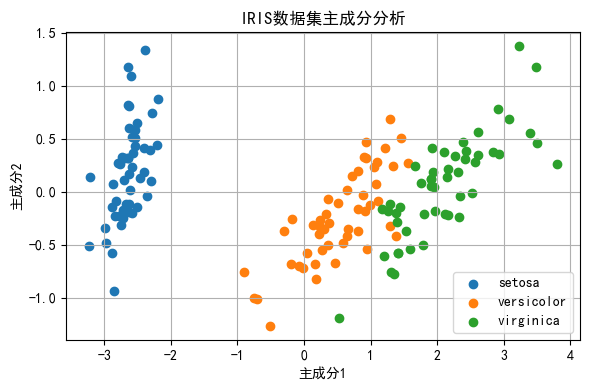

In [22]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 加载Iris数据集
iris = load_iris()
X = iris.data
y = iris.target

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,4))
# 使用PCA将数据降到2维
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 可视化降维后的数据

for i in range(len(iris.target_names)):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1],
label=iris.target_names[i])
plt.legend()
plt.title('IRIS数据集主成分分析')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.grid()
plt.tight_layout()
plt.show()

# LDA在Iris数据集上的应用

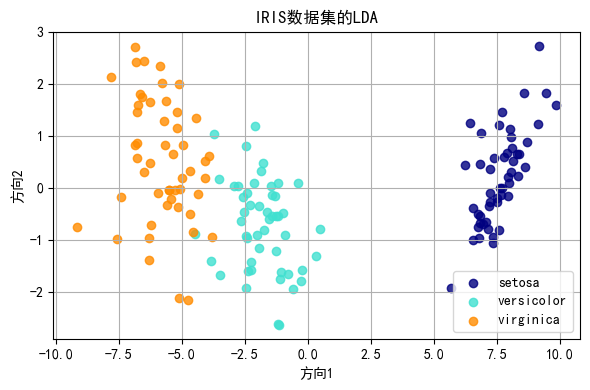

In [27]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

# 加载数据
iris = datasets.load_iris()
X = iris.data  # 特征矩阵
y = iris.target  # 类别标签

# 创建LDA模型实例并拟合数据
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# 可视化LDA降维后的数据
colors = ['navy', 'turquoise', 'darkorange']
target_names = iris.target_names
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,4))

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
	plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('IRIS数据集的LDA')
plt.xlabel('方向1')
plt.ylabel('方向2')
plt.grid()
plt.tight_layout()
plt.show()

# 协方差矩阵

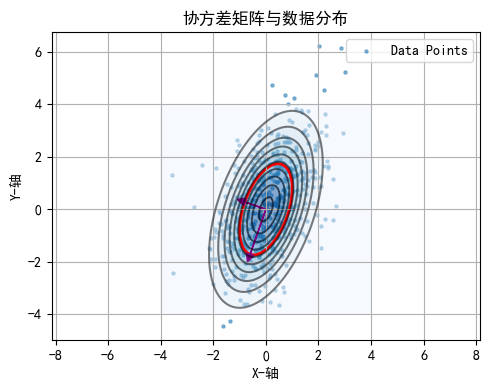

In [79]:
# 导入必要的库
import numpy as np  # 用于数值计算
import matplotlib.pyplot as plt  # 用于绘制图表
from scipy.stats import multivariate_normal  # 用于创建多元正态分布

# 定义二维高斯分布的参数
mean = [0, 0]  # 数据的均值向量，表示数据集中心位置
cov_matrix = [[1, 0.8], [0.8, 3]]  # 协方差矩阵，描述了数据点之间的关系和分布形状

# 使用numpy生成服从上述定义的高斯分布的数据点
data = np.random.multivariate_normal(mean, cov_matrix, 500)  # 生成500个样本点

# 计算协方差矩阵的特征值和特征向量，它们可以用来构造代表数据分布的椭圆
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 开始绘制图形
plt.figure(figsize=(5, 4))  # 设置画布大小为5x5英寸

# 绘制散点图来展示数据点
# 点的大小设置为5，透明度为0.5
plt.scatter(data[:, 0], data[:, 1], s=5, alpha=0.5, label='Data Points') 

# 创建一个多元正态分布对象，用于后续绘制等高线图
rv = multivariate_normal(mean, cov_matrix)

# 创建网格坐标，用于绘制等高线图，范围是-4到4，间隔0.01
x, y = np.mgrid[-4:4:.01, -4:4:.01]

# 将网格坐标转换成适合输入给pdf函数的形式
pos = np.dstack((x, y))

# 绘制等高线图，它显示了不同概率密度的区域
plt.contour(x, y, rv.pdf(pos), levels=10, colors='k', alpha=0.5)  # 黑色轮廓线，透明度为0.5
plt.contourf(x, y, rv.pdf(pos), levels=10, cmap='Blues', alpha=0.5)  # 蓝色调填充，透明度为0.5

# 计算椭圆的角度，这是由特征向量的方向决定的
theta = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))  # 特征向量的方向角转换为度数

# 椭圆的宽度和高度是特征值的两倍平方根（对应于两个标准差）
width, height = 2 * np.sqrt(eigenvalues)

# 创建椭圆对象，并添加到当前的轴上
ellipse = plt.matplotlib.patches.Ellipse(xy=mean, width=width, height=height, angle=theta,edgecolor='r', fc='None', lw=2)
plt.gca().add_patch(ellipse)


for length, vector in zip(sorted(eigenvalues,reverse=True), np.fliplr(eigenvectors)):
    # np.sqrt(length) 代表了沿着该特征向量方向上的标准差，反映了数据沿此方向的分散程度。
    v = vector * np.sqrt(length)  
    # 绘制主成分变量的箭头
    plt.arrow(0, 0, v[0], v[1], head_width=0.3, head_length=0.3, fc='purple', ec='purple')

plt.title('协方差矩阵与数据分布')
plt.xlabel('X-轴')
plt.ylabel('Y-轴')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.grid()
plt.show()

# 核化PCA

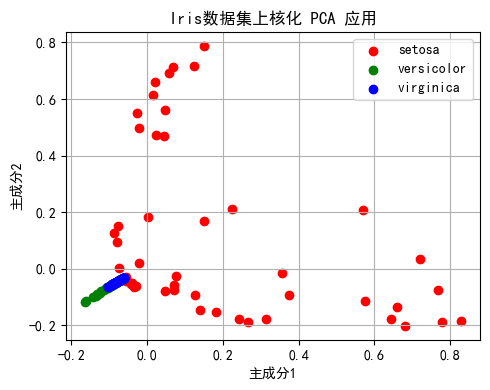

In [89]:
# 导入必要的库
from sklearn.decomposition import KernelPCA  # 核化PCA模型
from sklearn.datasets import load_iris        # 加载Iris数据集
import matplotlib.pyplot as plt               # 绘图工具
import numpy as np                            # 数值计算库

# 加载Iris数据集，该数据集包含150个样本，每个样本有4个特征，分为3类
iris = load_iris()
X = iris.data  # 特征矩阵，每行代表一个样本，每列代表一个特征
y = iris.target  # 类别标签向量

# 初始化KernelPCA模型，选择径向基函数(RBF)作为核函数，
# 并指定n_components参数为2以获取前两个主成分
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)

# 拟合模型到数据，并将原始数据转换到由核化PCA定义的新坐标系中
X_kpca = kpca.fit_transform(X)

# 创建图表并设置尺寸
plt.figure(figsize=(5, 4))

# 使用for循环绘制不同类别的数据点，用不同颜色区分
for c, i, target_name in zip("rgb", [0, 1, 2], iris.target_names):
    plt.scatter(X_kpca[y == i, 0], X_kpca[y == i, 1], c=c, label=target_name)  # 绘制散点图

# 添加图表标题和轴标签
plt.title('Iris数据集上核化 PCA 应用')
plt.xlabel('主成分1')  # 第一主成分
plt.ylabel('主成分2')  # 第二主成分

# 显示图例，帮助识别类别
plt.legend()
plt.grid()
plt.tight_layout()
# 显示生成的图表
plt.show()